<a href="https://colab.research.google.com/github/yogakun01/UTS-SistemPakar/blob/main/SISTEM_FUZZY_LOGIC_UNTUK_PREDIKSI_KUALITAS_UDARA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# SISTEM FUZZY LOGIC UNTUK PREDIKSI KUALITAS UDARA
# Ujian Tengah Semester - Sistem Pakar
# Nama: [I made Sedana Yoga]
# NIM: [2301020063]

# Install library yang diperlukan (jalankan di Google Colab)
# !pip install scikit-fuzzy matplotlib numpy

In [2]:
!pip install scikit-fuzzy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 920.8/920.8 kB 12.7 MB/s eta 0:00:00


In [3]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import matplotlib.pyplot as plt

In [4]:
print("="*70)
print("SISTEM FUZZY LOGIC - PREDIKSI KUALITAS UDARA")
print("="*70)
print()

SISTEM FUZZY LOGIC - PREDIKSI KUALITAS UDARA



In [5]:
# 1. DEFINISI INPUT DAN OUTPUT VARIABLES

# Input Variable 1: PM2.5 (0-500 µg/m³)
pm25 = ctrl.Antecedent(np.arange(0, 501, 1), 'pm25')
pm25['baik'] = fuzz.trimf(pm25.universe, [0, 0, 50])
pm25['sedang'] = fuzz.trimf(pm25.universe, [25, 50, 150])
pm25['tidak_sehat'] = fuzz.trimf(pm25.universe, [50, 150, 250])
pm25['berbahaya'] = fuzz.trimf(pm25.universe, [150, 500, 500])

# Input Variable 2: AQI (0-500)
aqi = ctrl.Antecedent(np.arange(0, 501, 1), 'aqi')
aqi['baik'] = fuzz.trimf(aqi.universe, [0, 0, 50])
aqi['sedang'] = fuzz.trimf(aqi.universe, [25, 75, 125])
aqi['tidak_sehat'] = fuzz.trimf(aqi.universe, [100, 150, 200])
aqi['berbahaya'] = fuzz.trimf(aqi.universe, [175, 500, 500])

# Output Variable: Kualitas Udara (0-100)
kualitas = ctrl.Consequent(np.arange(0, 101, 1), 'kualitas')
kualitas['sangat_baik'] = fuzz.trimf(kualitas.universe, [0, 0, 25])
kualitas['baik'] = fuzz.trimf(kualitas.universe, [15, 35, 55])
kualitas['sedang'] = fuzz.trimf(kualitas.universe, [45, 60, 75])
kualitas['buruk'] = fuzz.trimf(kualitas.universe, [65, 80, 90])
kualitas['sangat_buruk'] = fuzz.trimf(kualitas.universe, [85, 100, 100])




[INFO] Generating Membership Function Visualizations...


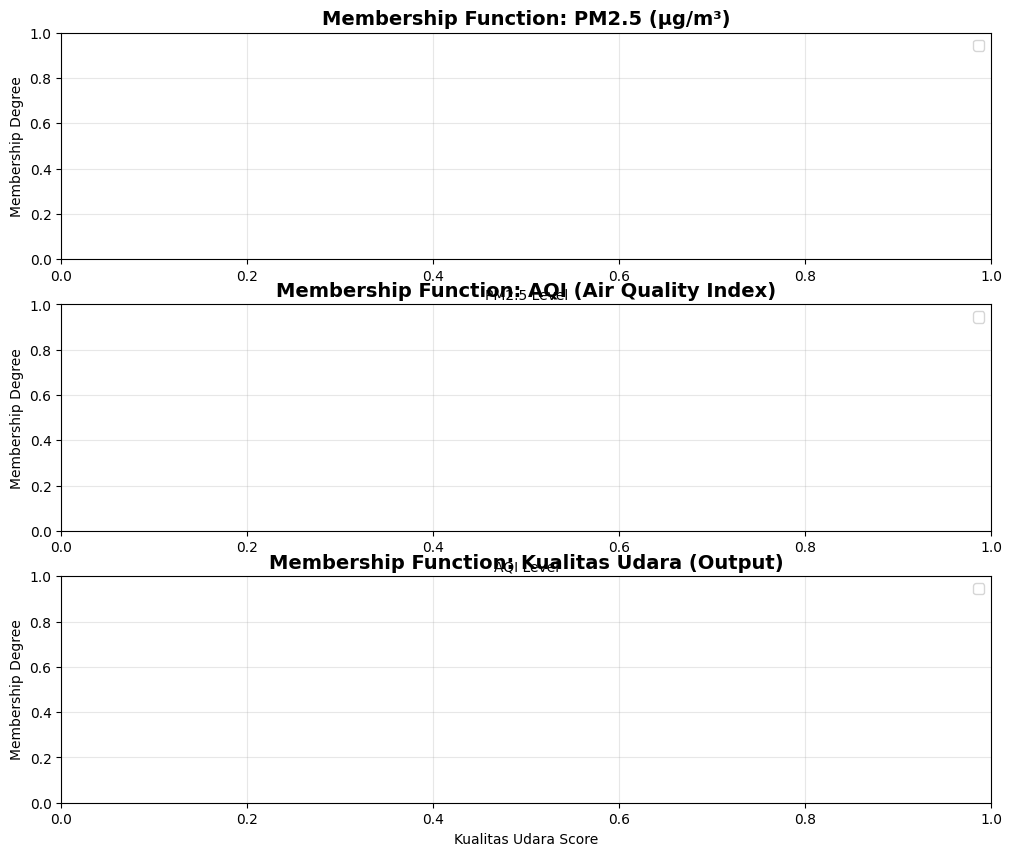

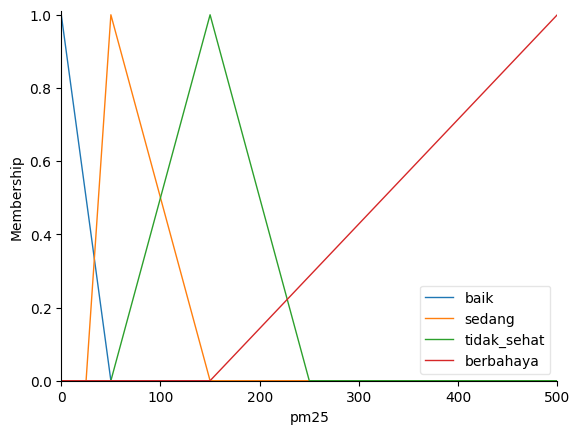

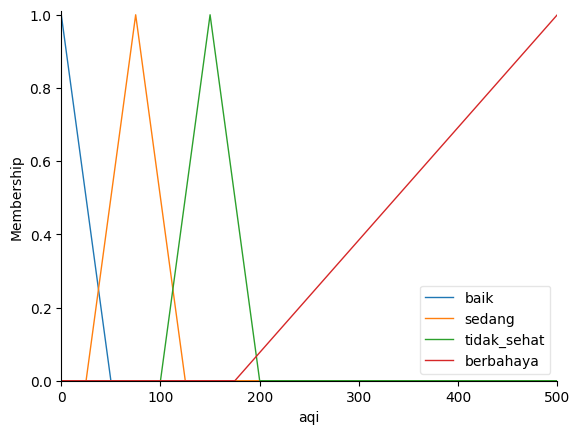

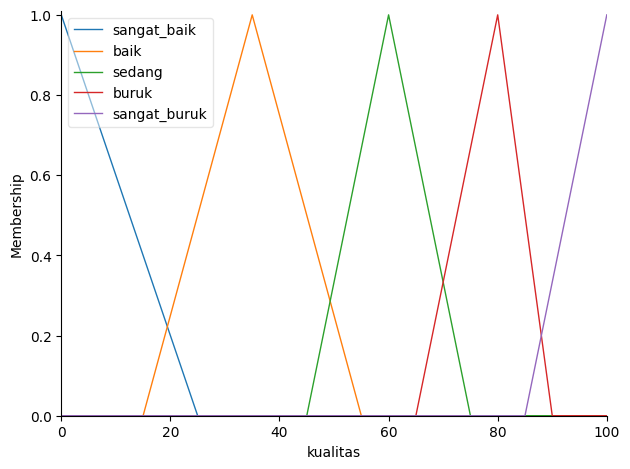

[SUCCESS] Membership functions visualized successfully!


In [6]:
# 2. VISUALISASI MEMBERSHIP FUNCTIONS

print("\n[INFO] Generating Membership Function Visualizations...")

# Visualisasi PM2.5
fig, axes = plt.subplots(3, 1, figsize=(12, 10))

pm25.view(ax=axes[0])
axes[0].set_title('Membership Function: PM2.5 (µg/m³)', fontsize=14, fontweight='bold')
axes[0].set_xlabel('PM2.5 Level')
axes[0].set_ylabel('Membership Degree')
axes[0].grid(True, alpha=0.3)
axes[0].legend(['Baik', 'Sedang', 'Tidak Sehat', 'Berbahaya'])

# Visualisasi AQI
aqi.view(ax=axes[1])
axes[1].set_title('Membership Function: AQI (Air Quality Index)', fontsize=14, fontweight='bold')
axes[1].set_xlabel('AQI Level')
axes[1].set_ylabel('Membership Degree')
axes[1].grid(True, alpha=0.3)
axes[1].legend(['Baik', 'Sedang', 'Tidak Sehat', 'Berbahaya'])

# Visualisasi Kualitas Udara
kualitas.view(ax=axes[2])
axes[2].set_title('Membership Function: Kualitas Udara (Output)', fontsize=14, fontweight='bold')
axes[2].set_xlabel('Kualitas Udara Score')
axes[2].set_ylabel('Membership Degree')
axes[2].grid(True, alpha=0.3)
axes[2].legend(['Sangat Baik', 'Baik', 'Sedang', 'Buruk', 'Sangat Buruk'])

plt.tight_layout()
plt.savefig('membership_functions.png', dpi=300, bbox_inches='tight')
plt.show()

print("[SUCCESS] Membership functions visualized successfully!")

In [7]:
# 3. DEFINISI FUZZY RULES (Minimal 10 Rules)

print("\n" + "="*70)
print("FUZZY RULES DEFINITION (15 Rules)")
print("="*70)

rules = [
    # Rule 1-2: Kondisi Sangat Baik
    ctrl.Rule(pm25['baik'] & aqi['baik'], kualitas['sangat_baik']),
    ctrl.Rule(pm25['baik'] & aqi['sedang'], kualitas['baik']),

    # Rule 3-5: Kondisi Sedang
    ctrl.Rule(pm25['sedang'] & aqi['baik'], kualitas['baik']),
    ctrl.Rule(pm25['sedang'] & aqi['sedang'], kualitas['sedang']),
    ctrl.Rule(pm25['baik'] & aqi['tidak_sehat'], kualitas['sedang']),

    # Rule 6-9: Kondisi Buruk
    ctrl.Rule(pm25['tidak_sehat'] & aqi['sedang'], kualitas['sedang']),
    ctrl.Rule(pm25['tidak_sehat'] & aqi['tidak_sehat'], kualitas['buruk']),
    ctrl.Rule(pm25['sedang'] & aqi['tidak_sehat'], kualitas['buruk']),
    ctrl.Rule(pm25['tidak_sehat'] & aqi['baik'], kualitas['sedang']),

    # Rule 10-15: Kondisi Sangat Buruk (prioritas tinggi dengan OR)
    ctrl.Rule(pm25['berbahaya'] | aqi['berbahaya'], kualitas['sangat_buruk']),
    ctrl.Rule(pm25['berbahaya'] & aqi['tidak_sehat'], kualitas['sangat_buruk']),
    ctrl.Rule(pm25['tidak_sehat'] & aqi['berbahaya'], kualitas['sangat_buruk']),
    ctrl.Rule(pm25['berbahaya'] & aqi['sedang'], kualitas['buruk']),
    ctrl.Rule(pm25['sedang'] & aqi['berbahaya'], kualitas['buruk']),
    ctrl.Rule(pm25['berbahaya'] & aqi['berbahaya'], kualitas['sangat_buruk']),
]

for i, rule in enumerate(rules, 1):
    print(f"Rule {i:2d}: {rule}")


FUZZY RULES DEFINITION (15 Rules)
Rule  1: IF pm25[baik] AND aqi[baik] THEN kualitas[sangat_baik]
	AND aggregation function : fmin
	OR aggregation function  : fmax
Rule  2: IF pm25[baik] AND aqi[sedang] THEN kualitas[baik]
	AND aggregation function : fmin
	OR aggregation function  : fmax
Rule  3: IF pm25[sedang] AND aqi[baik] THEN kualitas[baik]
	AND aggregation function : fmin
	OR aggregation function  : fmax
Rule  4: IF pm25[sedang] AND aqi[sedang] THEN kualitas[sedang]
	AND aggregation function : fmin
	OR aggregation function  : fmax
Rule  5: IF pm25[baik] AND aqi[tidak_sehat] THEN kualitas[sedang]
	AND aggregation function : fmin
	OR aggregation function  : fmax
Rule  6: IF pm25[tidak_sehat] AND aqi[sedang] THEN kualitas[sedang]
	AND aggregation function : fmin
	OR aggregation function  : fmax
Rule  7: IF pm25[tidak_sehat] AND aqi[tidak_sehat] THEN kualitas[buruk]
	AND aggregation function : fmin
	OR aggregation function  : fmax
Rule  8: IF pm25[sedang] AND aqi[tidak_sehat] THEN k

In [8]:
# 4. FUZZY INFERENCE SYSTEM (Mamdani)

print("\n[INFO] Creating Fuzzy Inference System (Mamdani Method)...")
kualitas_ctrl = ctrl.ControlSystem(rules)
kualitas_sim = ctrl.ControlSystemSimulation(kualitas_ctrl)
print("[SUCCESS] Fuzzy Inference System created successfully!")


[INFO] Creating Fuzzy Inference System (Mamdani Method)...
[SUCCESS] Fuzzy Inference System created successfully!


In [9]:
# 5. TESTING DENGAN 5 TEST CASES

print("\n" + "="*70)
print("TESTING FUZZY SYSTEM - 5 TEST CASES")
print("="*70)

test_cases = [
    {"pm25": 30, "aqi": 40, "desc": "Kondisi Baik"},
    {"pm25": 80, "aqi": 90, "desc": "Kondisi Sedang"},
    {"pm25": 180, "aqi": 160, "desc": "Kondisi Tidak Sehat"},
    {"pm25": 300, "aqi": 350, "desc": "Kondisi Berbahaya"},
    {"pm25": 120, "aqi": 55, "desc": "Kondisi Mixed (PM2.5 tinggi, AQI rendah)"},
]

def interpret_result(score):
    """Interpretasi hasil defuzzification"""
    if score <= 25:
        return "SANGAT BAIK", "🟢"
    elif score <= 55:
        return "BAIK", "🟢"
    elif score <= 75:
        return "SEDANG", "🟡"
    elif score <= 90:
        return "BURUK", "🟠"
    else:
        return "SANGAT BURUK", "🔴"

results = []

for i, test in enumerate(test_cases, 1):
    print(f"\n{'='*70}")
    print(f"TEST CASE {i}: {test['desc']}")
    print(f"{'='*70}")
    print(f"Input:")
    print(f"  - PM2.5  : {test['pm25']} µg/m³")
    print(f"  - AQI    : {test['aqi']}")

    # Proses fuzzy inference
    kualitas_sim.input['pm25'] = test['pm25']
    kualitas_sim.input['aqi'] = test['aqi']

    # Compute (defuzzification)
    kualitas_sim.compute()

    # Hasil
    output_score = kualitas_sim.output['kualitas']
    category, emoji = interpret_result(output_score)

    print(f"\nOutput (Defuzzification):")
    print(f"  - Kualitas Udara Score: {output_score:.2f}")
    print(f"  - Kategori: {category} {emoji}")

    # Rekomendasi
    print(f"\nRekomendasi:")
    if output_score <= 25:
        print("  ✓ Kualitas udara sangat baik, aman untuk aktivitas outdoor")
    elif output_score <= 55:
        print("  ✓ Kualitas udara baik, aktivitas normal dapat dilakukan")
    elif output_score <= 75:
        print("  ⚠ Kualitas udara sedang, kurangi aktivitas outdoor yang berat")
    elif output_score <= 90:
        print("  ⚠ Kualitas udara buruk, batasi aktivitas outdoor")
    else:
        print("  ⛔ Kualitas udara sangat buruk, hindari aktivitas outdoor!")

    results.append({
        "test_case": i,
        "pm25": test['pm25'],
        "aqi": test['aqi'],
        "output": output_score,
        "category": category
    })


TESTING FUZZY SYSTEM - 5 TEST CASES

TEST CASE 1: Kondisi Baik
Input:
  - PM2.5  : 30 µg/m³
  - AQI    : 40

Output (Defuzzification):
  - Kualitas Udara Score: 36.46
  - Kategori: BAIK 🟢

Rekomendasi:
  ✓ Kualitas udara baik, aktivitas normal dapat dilakukan

TEST CASE 2: Kondisi Sedang
Input:
  - PM2.5  : 80 µg/m³
  - AQI    : 90

Output (Defuzzification):
  - Kualitas Udara Score: 60.00
  - Kategori: SEDANG 🟡

Rekomendasi:
  ⚠ Kualitas udara sedang, kurangi aktivitas outdoor yang berat

TEST CASE 3: Kondisi Tidak Sehat
Input:
  - PM2.5  : 180 µg/m³
  - AQI    : 160

Output (Defuzzification):
  - Kualitas Udara Score: 79.43
  - Kategori: BURUK 🟠

Rekomendasi:
  ⚠ Kualitas udara buruk, batasi aktivitas outdoor

TEST CASE 4: Kondisi Berbahaya
Input:
  - PM2.5  : 300 µg/m³
  - AQI    : 350

Output (Defuzzification):
  - Kualitas Udara Score: 94.27
  - Kategori: SANGAT BURUK 🔴

Rekomendasi:
  ⛔ Kualitas udara sangat buruk, hindari aktivitas outdoor!

TEST CASE 5: Kondisi Mixed (PM2.5 ti

In [10]:
# 6. SUMMARY HASIL TESTING

print("\n" + "="*70)
print("SUMMARY HASIL TESTING")
print("="*70)
print(f"{'Test':<6} {'PM2.5':<8} {'AQI':<8} {'Output':<10} {'Kategori':<15}")
print("-"*70)
for r in results:
    print(f"{r['test_case']:<6} {r['pm25']:<8} {r['aqi']:<8} {r['output']:<10.2f} {r['category']:<15}")

print("\n" + "="*70)
print("SISTEM FUZZY BERHASIL DIJALANKAN!")
print("="*70)



SUMMARY HASIL TESTING
Test   PM2.5    AQI      Output     Kategori       
----------------------------------------------------------------------
1      30       40       36.46      BAIK           
2      80       90       60.00      SEDANG         
3      180      160      79.43      BURUK          
4      300      350      94.27      SANGAT BURUK   
5      120      55       60.00      SEDANG         

SISTEM FUZZY BERHASIL DIJALANKAN!



[INFO] Generating defuzzification visualization for Test Case 3...


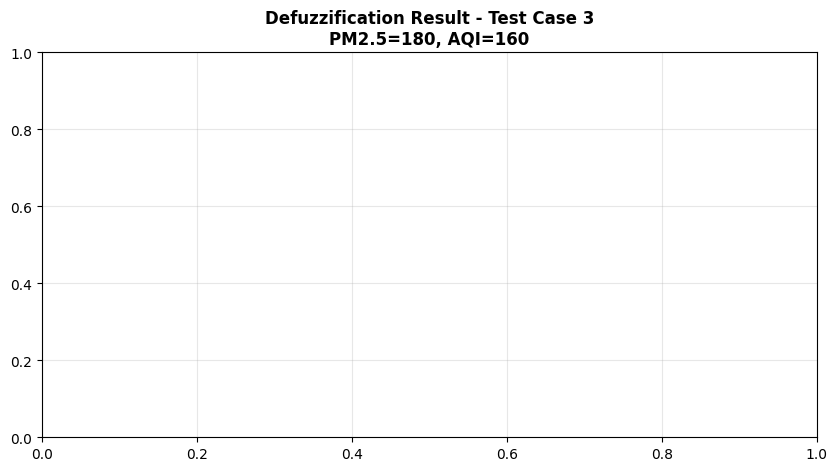

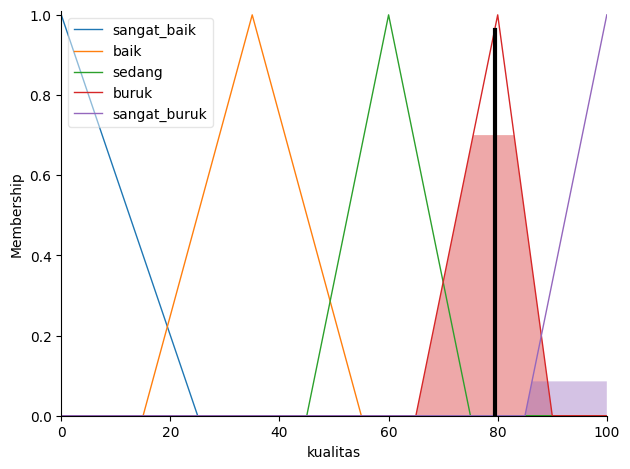

[SUCCESS] Defuzzification visualization completed!

✓ File saved: membership_functions.png
✓ File saved: defuzzification_result.png


In [11]:
# 7. VISUALISASI HASIL DEFUZZIFICATION (CONTOH UNTUK TEST CASE 3)

print("\n[INFO] Generating defuzzification visualization for Test Case 3...")

kualitas_sim.input['pm25'] = test_cases[2]['pm25']
kualitas_sim.input['aqi'] = test_cases[2]['aqi']
kualitas_sim.compute()

fig, ax = plt.subplots(figsize=(10, 5))
kualitas.view(sim=kualitas_sim, ax=ax)
ax.set_title(f'Defuzzification Result - Test Case 3\nPM2.5={test_cases[2]["pm25"]}, AQI={test_cases[2]["aqi"]}',
             fontsize=12, fontweight='bold')
ax.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('defuzzification_result.png', dpi=300, bbox_inches='tight')
plt.show()

print("[SUCCESS] Defuzzification visualization completed!")
print("\n✓ File saved: membership_functions.png")
print("✓ File saved: defuzzification_result.png")